In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("train.csv")
train_add = pd.read_csv("train_add.csv")
data_2014 = pd.read_csv("2014_add.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submit.csv",header=None)
stadium = pd.read_csv("stadium.csv")
condition= pd.read_csv("condition.csv")
condition_add= pd.read_csv("condition_add.csv")

In [3]:
# trainとtrain_addを結合
train = pd.concat([train,train_add])

In [4]:
# in[3]で結合したtrainにさらにtrain_add2を結合
train = pd.concat([train,data_2014])

In [5]:
# conditionとcondition_addを結合
condtion = pd.concat([condition,condition_add])

In [6]:
# ln[4]で結合したtrainにln[5]で結合したconditionを結合
train= pd.merge(train,condition,how='left',left_on= 'id',right_on='id')

In [7]:
train.to_csv('train_id.csv')

In [8]:
test = pd.concat([test,data_2014])

In [9]:
test= pd.merge(test,condition,how='left',left_on= 'id',right_on='id')

In [10]:
test.to_csv('test_id.csv')

In [11]:
# 基本統計量の確認
train.describe()

,id,y,year,home_score,away_score,temperature
count,1991.000000,1953.000000,1991.000000,1721.000000,1721.000000,1721.000000
mean,15070.946760,10629.558116,2012.842793,1.365485,1.205694,20.471528
std,659.083664,8102.315189,0.768014,1.188880,1.124046,6.426897
min,13994.000000,0.000000,2012.000000,0.000000,0.000000,3.400000
25%,14491.500000,4687.000000,2012.000000,0.000000,0.000000,15.800000
50%,15063.000000,8594.000000,2013.000000,1.000000,1.000000,21.400000
75%,15560.500000,13471.000000,2013.000000,2.000000,2.000000,25.600000
max,16430.000000,62632.000000,2014.000000,7.000000,8.000000,34.200000


In [12]:
# trainデータのy(観客数)の値の平均を求める
train["y"].mean()

10629.558115719406

In [13]:
# y（観客数）が10000以上を求める
train[train["y"]>=10000]

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,24316.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,17066.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,29603.0,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,25353.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,15810,12673.0,2014,Ｊ１,第１６節第１日,07/23(水),19:04,サンフレッチェ広島,柏レイソル,エディオンスタジアム広島,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,15811,10860.0,2014,Ｊ１,第１６節第１日,07/23(水),19:05,徳島ヴォルティス,浦和レッズ,鳴門・大塚スポーツパーク ポカリスエットスタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,15818,16261.0,2014,Ｊ１,第１７節第１日,07/27(日),19:04,名古屋グランパス,横浜Ｆ・マリノス,名古屋市瑞穂陸上競技場,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,15975,12658.0,2014,Ｊ２,第１節第１日,03/02(日),13:04,東京ヴェルディ,松本山雅ＦＣ,味の素スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# trainデータのJ１でかつyを小さい順にソート
train[train["stage"] == "Ｊ１"].sort_values(by="y")

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
1385,15699,0.0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,...,石毛 秀樹,平岡 康裕,カルフィン ヨン ア ピン,吉田 豊,河井 陽介,六平 光成,竹内 涼,大前 元紀,ノヴァコヴィッチ,長沢 駿
56,14053,5432.0,2012,Ｊ１,第７節第１日,04/21(土),17:05,サガン鳥栖,アルビレックス新潟,佐賀県総合運動場陸上競技場,...,村上 佑介,鈴木 大輔,石川 直樹,金 珍洙,三門 雄大,本間 勲,ミシェウ,アラン ミネイロ,平井 将生,ブルーノ ロペス
792,14965,5698.0,2013,Ｊ１,第１５節第１日,07/10(水),19:04,ジュビロ磐田,アルビレックス新潟,ヤマハスタジアム（磐田）,...,川口 尚紀,濱田 水輝,大井 健太郎,金 珍洙,三門 雄大,レオ シルバ,成岡 翔,田中 亜土夢,岡本 英也,川又 堅碁
810,14985,6080.0,2013,Ｊ１,第１７節第１日,07/17(水),19:04,湘南ベルマーレ,アルビレックス新潟,Ｓｈｏｎａｎ ＢＭＷスタジアム平塚,...,川口 尚紀,金 根煥,大井 健太郎,金 珍洙,三門 雄大,レオ シルバ,成岡 翔,田中 亜土夢,田中 達也,川又 堅碁
1426,15744,6096.0,2014,Ｊ１,第９節第１日,04/26(土),14:05,徳島ヴォルティス,アルビレックス新潟,鳴門・大塚スポーツパーク ポカリスエットスタジアム,...,松原 健,舞行龍ジェームズ,大井 健太郎,金 珍洙,レオ シルバ,小泉 慶,成岡 翔,岡本 英也,鈴木 武蔵,川又 堅碁
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,15931,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,鹿島アントラーズ,浦和レッズ,県立カシマサッカースタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,15938,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,清水エスパルス,サンフレッチェ広島,ＩＡＩスタジアム日本平,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,15946,NaN,2014,Ｊ１,第３１節第２日,11/03(月・祝),17:04,横浜Ｆ・マリノス,浦和レッズ,日産スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,15948,NaN,2014,Ｊ１,第３２節第１日,11/22(土),17:04,ベガルタ仙台,セレッソ大阪,ユアテックスタジアム仙台,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 大きい順にソート
train[train["stage"] == "Ｊ１"].sort_values(by="y",ascending=False)

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
1844,15127,62632.0,2013,Ｊ１,第３３節第１日,11/30(土),14:04,横浜Ｆ・マリノス,アルビレックス新潟,日産スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,15134,54905.0,2013,Ｊ１,第３４節第１日,12/07(土),15:34,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,...,茂庭 照幸,丸橋 祐介,酒本 憲幸,山下 達也,扇原 貴宏,山口 螢,南野 拓実,杉本 健勇,柿谷 曜一朗,エジノ
1463,15787,54350.0,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,...,藤本 康太,山下 達也,ゴイコ カチャル,長谷川 アーリアジャスール,山口 蛍,南野 拓実,丸橋 祐介,酒本 憲幸,柿谷 曜一朗,フォルラン
693,14852,52293.0,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,田中 隼磨,ダニエル,増川 隆洋,阿部 翔平,小川 佳純,中村 直志,ダニルソン,藤本 淳吾,ヤキモフスキー,矢野 貴章
270,14292,51879.0,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,ダニエル,田中 マルクス闘莉王,増川 隆洋,田中 隼磨,田口 泰士,ダニルソン,阿部 翔平,小川 佳純,玉田 圭司,永井 謙佑
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,15931,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,鹿島アントラーズ,浦和レッズ,県立カシマサッカースタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,15938,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,清水エスパルス,サンフレッチェ広島,ＩＡＩスタジアム日本平,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,15946,NaN,2014,Ｊ１,第３１節第２日,11/03(月・祝),17:04,横浜Ｆ・マリノス,浦和レッズ,日産スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,15948,NaN,2014,Ｊ１,第３２節第１日,11/22(土),17:04,ベガルタ仙台,セレッソ大阪,ユアテックスタジアム仙台,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 40000人以上にソート
train[train["y"]>=40000]

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
9,14004,41069.0,2012,Ｊ１,第２節第１日,03/17(土),14:04,浦和レッズ,柏レイソル,埼玉スタジアム２００２,...,酒井 宏樹,那須 大亮,増嶋 竜也,橋本 和,レアンドロ ドミンゲス,茨田 陽生,大谷 秀和,ジョルジ ワグネル,田中 順也,リカルド ロボ
74,14071,44422.0,2012,Ｊ１,第９節第１日,05/03(木・祝),19:05,浦和レッズ,横浜Ｆ・マリノス,埼玉スタジアム２００２,...,小林 祐三,栗原 勇蔵,中澤 佑二,ドゥトラ,熊谷 アンドリュー,兵藤 慎剛,中村 俊輔,齋藤 学,小野 裕二,大黒 将志
177,14186,44131.0,2012,Ｊ１,第２２節第１日,08/18(土),19:04,浦和レッズ,鹿島アントラーズ,埼玉スタジアム２００２,...,西 大伍,岩政 大樹,山村 和也,新井場 徹,柴崎 岳,青木 剛,ドゥトラ,レナト,興梠 慎三,大迫 勇也
208,14224,46046.0,2012,Ｊ１,第２６節第１日,09/22(土・祝),16:04,浦和レッズ,ガンバ大阪,埼玉スタジアム２００２,...,加地 亮,岩下 敬輔,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,二川 孝広,阿部 浩之,レアンドロ,家長 昭博
254,14275,41296.0,2012,Ｊ１,第３２節第１日,11/17(土),14:06,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,...,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,清水 航平,森﨑 浩司,髙萩 洋次郎,佐藤 寿人
270,14292,51879.0,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,ダニエル,田中 マルクス闘莉王,増川 隆洋,田中 隼磨,田口 泰士,ダニルソン,阿部 翔平,小川 佳純,玉田 圭司,永井 謙佑
693,14852,52293.0,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,田中 隼磨,ダニエル,増川 隆洋,阿部 翔平,小川 佳純,中村 直志,ダニルソン,藤本 淳吾,ヤキモフスキー,矢野 貴章
743,14911,40034.0,2013,Ｊ１,第９節第１日,05/03(金・祝),15:34,横浜Ｆ・マリノス,鹿島アントラーズ,日産スタジアム,...,西 大伍,岩政 大樹,青木 剛,中田 浩二,小笠原 満男,柴崎 岳,野沢 拓也,ジュニーニョ,大迫 勇也,ダヴィ
822,14998,42426.0,2013,Ｊ１,第１９節第１日,08/03(土),18:04,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,...,塩谷 司,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人
859,15043,40372.0,2013,Ｊ１,第２４節第１日,08/31(土),18:04,浦和レッズ,アルビレックス新潟,埼玉スタジアム２００２,...,川口 尚紀,大井 健太郎,舞行龍ジェームズ,金 珍洙,レオ シルバ,三門 雄大,成岡 翔,田中 亜土夢,田中 達也,川又 堅碁


In [17]:
# trainデータのJ１でかつyの値の平均
train[train["stage"] == "Ｊ１"].mean()

id             14822.589217
y              17377.150327
year            2012.821566
home_score         1.469630
away_score         1.278519
temperature       19.897630
dtype: float64

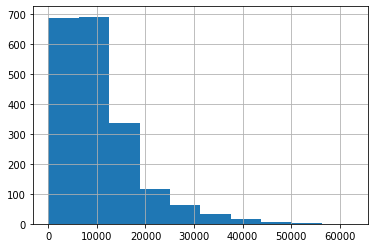

In [18]:
# ヒストグラムを書く
train["y"].hist()

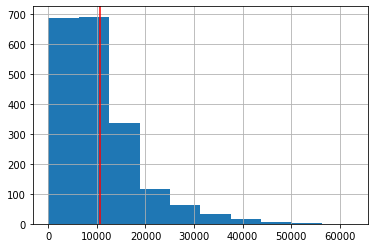

In [19]:
# ヒストグラムで平均値を表す。
# 平均値はaxvlineで引く（色は赤色とする）。
plt.axvline(x=train["y"].mean(),color="red")
train["y"].hist()

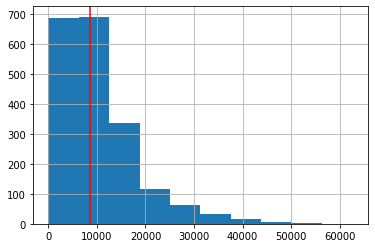

In [20]:
# ヒストグラムで中央値を表す。
# 平均値はaxvlineで引く（色は赤色とする）。
plt.axvline(x=train["y"].median(),color="red")
train["y"].hist()

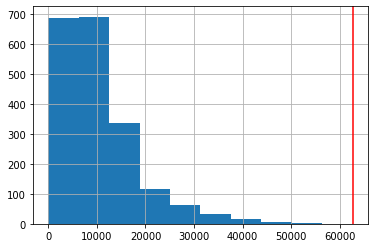

In [21]:
# ヒストグラムで最大値を表すして、平均値はaxvlineで引く（色は赤色とする）
plt.axvline(x=train["y"].max(),color="red")
train["y"].hist()

In [22]:
# 欠損値を確認
train.isnull().sum()

id               0
y               38
year             0
stage            0
match            0
gameday          0
time             0
home             0
away             0
stadium          0
tv               0
home_score     270
away_score     270
weather        270
temperature    270
humidity       270
referee        270
home_team      270
home_01        270
home_02        270
home_03        270
home_04        270
home_05        270
home_06        270
home_07        270
home_08        270
home_09        270
home_10        270
home_11        270
away_team      270
away_01        270
away_02        270
away_03        270
away_04        270
away_05        270
away_06        270
away_07        270
away_08        270
away_09        270
away_10        270
away_11        270
dtype: int64

In [23]:
train = train.drop(['home_score', 'away_score','temperature', 'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03','home_04','home_05','home_06','home_07','home_08', 'home_09','home_10','home_11','away_team','away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_09','away_10','away_11'], axis=1 )

In [24]:
test = test.drop(['home_score', 'away_score','temperature', 'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03','home_04','home_05','home_06','home_07','home_08', 'home_09','home_10','home_11','away_team','away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_09','away_10','away_11'], axis=1 )

In [25]:
print(train)

         id        y  year stage    match     gameday   time       home  \
0     13994  18250.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04     ベガルタ仙台   
1     13995  24316.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   名古屋グランパス   
2     13996  17066.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04      ガンバ大阪   
3     13997  29603.0  2012    Ｊ１   第１節第１日    03/10(土)  14:06  サンフレッチェ広島   
4     13998  25353.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   コンサドーレ札幌   
...     ...      ...   ...   ...      ...         ...    ...        ...   
1986  16398      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  14:05       ＦＣ岐阜   
1987  16400      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  13:03   カマタマーレ讃岐   
1988  16403      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  19:03     ロアッソ熊本   
1989  16428      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       栃木ＳＣ   
1990  16430      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       横浜ＦＣ   

           away            stadium                                  tv  \
0      鹿島アントラーズ       ユアテ

In [26]:
train.isnull().sum()

id           0
y           38
year         0
stage        0
match        0
gameday      0
time         0
home         0
away         0
stadium      0
tv           0
weather    270
dtype: int64

In [27]:
test.isnull().sum()

id          0
year        0
stage       0
match       0
gameday     0
time        0
home        0
away        0
stadium     0
tv          0
weather    38
dtype: int64

In [28]:
#  yの欠損値はmedianで保管する。
train["y"] = train["y"].fillna(train["y"].median())

In [29]:
train.isnull().sum()

id           0
y            0
year         0
stage        0
match        0
gameday      0
time         0
home         0
away         0
stadium      0
tv           0
weather    270
dtype: int64

In [30]:
# 欠損値が一つでも含まれる行・列を削除する: dropna(how='any')
train =train.dropna(how='any')

In [31]:
test =test.dropna(how='any')

In [32]:
train.isnull().sum()

id         0
y          0
year       0
stage      0
match      0
gameday    0
time       0
home       0
away       0
stadium    0
tv         0
weather    0
dtype: int64

In [33]:
test.isnull().sum()

id         0
year       0
stage      0
match      0
gameday    0
time       0
home       0
away       0
stadium    0
tv         0
weather    0
dtype: int64

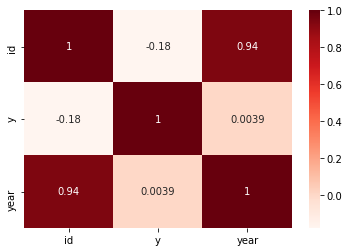

In [34]:
# seabornはデータの可視化(グラフ作成)を行うPythonライブラリ
import seaborn as sns
train_corr = train.corr()
#ヒートマップを表示
# annotは数字を入れるかどうか。cmapは色合い。
sns.heatmap(train_corr, annot=True,cmap='Reds')

In [35]:
# 目的変数はy（観客動員数）
# 説明変数について、観客動員数はtrainのstage（J１か、J2か）、またはhomeがどこのチームか、スタジアムが大きな影響を与えていると仮説を立てる。
# ただ、stage、home,awayに質的変数のため、ダミー変数化する。
train_dummie = pd.get_dummies(train[["stage","home","away","weather"]])
y =  train['y']
print(train_dummie)
print(y)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガイナーレ鳥取  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  \
0                 0             0           0               0              0   

In [36]:
train_dummie.head()

,stage_Ｊ１,stage_Ｊ２,home_アビスパ福岡,home_アルビレックス新潟,home_カターレ富山,home_カマタマーレ讃岐,home_ガイナーレ鳥取,home_ガンバ大阪,home_ギラヴァンツ北九州,home_コンサドーレ札幌,...,weather_曇時々晴一時雨,weather_曇時々雨,weather_曇時々雨のち晴,weather_雨,weather_雨のち晴,weather_雨のち曇,weather_雨のち曇時々晴,weather_雨時々晴,weather_雨時々曇,weather_雪のち雨
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test_dummie =pd.get_dummies(test[["stage","home","away","weather"]])

In [38]:
test_dummie.head()

,stage_Ｊ１,stage_Ｊ２,home_アビスパ福岡,home_アルビレックス新潟,home_カターレ富山,home_カマタマーレ讃岐,home_ガンバ大阪,home_ギラヴァンツ北九州,home_コンサドーレ札幌,home_サガン鳥栖,...,weather_晴時々曇,weather_曇,weather_曇のち晴,weather_曇のち雨,weather_曇一時雨,weather_曇時々晴,weather_曇時々雨,weather_雨,weather_雨のち曇,weather_雨のち曇一時雨
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# train_dummieとtest_dummieがどの部分が違うかを見る。
diff = list( set(train_dummie.columns)- set(test_dummie.columns))
print(diff)
print(len(train_dummie.columns))
print(len(test_dummie.columns))

['weather_晴のち雨', 'weather_雪のち雨', 'home_ＦＣ町田ゼルビア', 'weather_晴一時曇', 'weather_晴時々雪', 'weather_雨時々曇', 'home_ザスパ草津', 'weather_晴時々雨', 'weather_曇のち雷雨', 'weather_晴のち曇一時雨', 'weather_雨時々晴', 'weather_雨のち晴', 'away_ザスパ草津', 'weather_曇一時雨のち晴', 'weather_曇一時晴一時雨', 'weather_雨のち曇時々晴', 'weather_曇一時雷雨のち曇', 'away_ＦＣ町田ゼルビア', 'weather_曇一時晴', 'weather_晴のち曇時々雨', 'home_ガイナーレ鳥取', 'weather_曇時々晴一時雨', 'weather_曇時々雨のち晴', 'away_ガイナーレ鳥取', 'weather_曇のち雪']
120
97


In [40]:
print(train_dummie)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガイナーレ鳥取  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  \
0                 0             0           0               0              0   

In [41]:
print(test_dummie)

     stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0           1         0            0               0            0   
1           1         0            0               0            0   
2           1         0            0               0            0   
3           1         0            0               0            0   
4           1         0            0               1            0   
..        ...       ...          ...             ...          ...   
308         0         1            0               0            1   
309         0         1            0               0            0   
310         0         1            0               0            0   
311         0         1            1               0            0   
312         0         1            0               0            0   

     home_カマタマーレ讃岐  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  home_サガン鳥栖  \
0                0           0               0              0           0   
1                

In [43]:
# trainの['home_ガイナーレ鳥取', 'away_ＦＣ町田ゼルビア', 'home_ＦＣ町田ゼルビア', 'away_ガイナーレ鳥取', 'home_ザスパ草津', 'away_ザスパ草津']を削除する。
train_dummie = train_dummie.drop(['weather_晴のち雨', 'weather_雪のち雨', 'home_ＦＣ町田ゼルビア', 'weather_晴一時曇', 'weather_晴時々雪', 'weather_雨時々曇', 'home_ザスパ草津', 'weather_晴時々雨', 'weather_曇のち雷雨', 'weather_晴のち曇一時雨', 'weather_雨時々晴', 'weather_雨のち晴', 'away_ザスパ草津', 'weather_曇一時雨のち晴', 'weather_曇一時晴一時雨', 'weather_雨のち曇時々晴', 'weather_曇一時雷雨のち曇', 'away_ＦＣ町田ゼルビア', 'weather_曇一時晴', 'weather_晴のち曇時々雨', 'home_ガイナーレ鳥取', 'weather_曇時々晴一時雨', 'weather_曇時々雨のち晴', 'away_ガイナーレ鳥取', 'weather_曇のち雪'],axis=1)

In [44]:
print(train_dummie)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  home_サガン鳥栖  \
0                 0           0               0              0           0   
1  

In [45]:
diff = list( set(test_dummie.columns)- set(train_dummie.columns))
print(diff)
print(len(train_dummie.columns))
print(len(test_dummie.columns))

['weather_雨のち曇一時雨', 'weather_晴のち雪']
95
97


In [46]:
test_dummie = test_dummie.drop(['weather_雨のち曇一時雨', 'weather_晴のち雪'],axis=1)

In [47]:
diff = list( set(test_dummie.columns)- set(train_dummie.columns))
print(diff)
print(len(train_dummie.columns))
print(len(test_dummie.columns))

[]
95
95


In [48]:
model = LinearRegression()
model.fit(train_dummie,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
test['y'] = model.predict(test_dummie)
print(test['y'])

0      14272.0
1      18304.0
2      34880.0
3      13984.0
4      28192.0
        ...   
308     3584.0
309     7200.0
310     3968.0
311     5504.0
312     9408.0
Name: y, Length: 313, dtype: float64


In [50]:
sample[1] = test['y']

In [51]:
sample.to_csv("submit4.csv",index=None,header=None)

In [ ]:
# やったこと、ダミー変数に["stage","home","away",　'weather','stadium']を入れてカラム調整をした所大きく順位を下げた。（測定不能状態）
# ["stage","home","away",stadium]にした所あまり順位の下げが変わらない。（測定不能状態）
# ["stage","home","away",　'weather']にした所、["stage","home","away"]より順位が上がった。



# 天気が大きな原因であることがわかったので天気のAPIを用いて分析することにする。